<a href="https://colab.research.google.com/github/Rafal-Wawrzak/Fianal_One/blob/main/Project_1_Final_regression_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pandas
import pandas as pd

#Visual Exploration
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Meching Learning Items
from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(display='diagram')

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.tree import DecisionTreeRegressor

# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#enter path for CSV, or Excel
path = '/content/drive/MyDrive/Boot  Camp/Project one/sales_predictions.csv'

In [3]:
##################################
# Comment out the one not needed #
##################################
df = pd.read_csv(path) #excel Load 

In [4]:
def evaluate_model(y_true, y_pred):
  """takes two arrays, true labels and predicted labels, and prints
  MAE, MSE, RMSE, and R2 metrics"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f'MAE {mae}\n MSE {mse}\n R^2 {r2}\n RMSE {rmse}')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Tree Regression

In [6]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
dec_tree = DecisionTreeRegressor( max_depth = 4, random_state = 42)

In [8]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

median_imputer.fit(X_train[num_columns])
freq_imputer.fit(X_train[cat_columns])

X_train.loc[:, num_columns] = median_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = median_imputer.transform(X_test[num_columns])

X_train.loc[:, cat_columns] = freq_imputer.transform(X_train[cat_columns])
X_test.loc[:, cat_columns] = freq_imputer.transform(X_test[cat_columns])

scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

num_tuple = (scaler, num_selector)
cat_tuple = (ohe_encoder, cat_selector)

col_trans = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
lin_reg = LinearRegression()

pipe = make_pipeline(col_trans, dec_tree)

In [9]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f22f6bf6310>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f22f6bf62d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=4, random_state=42))])

In [10]:
evaluate_model(y_train, pipe.predict(X_train))

MAE 787.619263686797
 MSE 1234964.9023506837
 R^2 0.5827053939473481
 RMSE 1111.2897472534712


In [11]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    pipe = make_pipeline(col_trans, dec_tree)
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    r2.append(score)

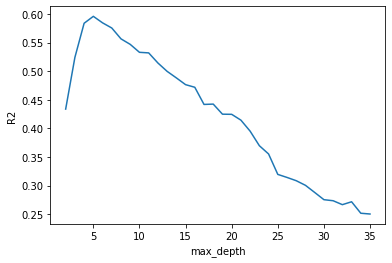

In [12]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [13]:
print(r2)

[0.4337775044707164, 0.5242218617296539, 0.5839367270114887, 0.5960564372160061, 0.5846684022696164, 0.5756329789137498, 0.5566257704918428, 0.5470124412337426, 0.5331043109244693, 0.5321055035222457, 0.5144481581014448, 0.49978899762807083, 0.4883730297654587, 0.4765440617535407, 0.4719481833194099, 0.44193268325848634, 0.4425059255567467, 0.4248722488712996, 0.4246084640132005, 0.4144274173687833, 0.3951542354452102, 0.3697139064326802, 0.3552598518912923, 0.3195069933519127, 0.314200417956068, 0.30847396733514076, 0.30038877675680753, 0.28792307684363894, 0.2752950220559345, 0.27343653043684724, 0.26657811320368163, 0.27162052788541324, 0.25155609352284924, 0.25021616304167804]
